# Big data lab

## import library

In [2]:
import pandas as pd
import pickle
import my_func
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from datetime import datetime, timedelta
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set()

fe_name_tr = 'churn_train_model_fe.pickle'
b_num_name_tr ='churn_train_model_b_num.pickle'
dpi_name_tr ='churn_train_model_dpi.pickle'

fe_name_te = 'churn_test_model_fe.pickle'
b_num_name_te ='churn_test_model_b_num.pickle'
dpi_name_te ='churn_test_model_dpi.pickle'

file_path = r'D:\BDL-Final\data-from-BDL' + '\\'

# settings for dataframe
pd.set_option('display.max_columns', None)

In [2]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 20,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'n_estimators': 100,
    'early_stopping_rounds': 20,
    'is_unbalance': True,
    'random_state': 42
}


In [2]:
# Load dataframes
df_train_fe = pd.read_pickle(file_path+fe_name_tr)
df_train_dpi = pd.read_pickle(file_path+dpi_name_tr)
df_train_b_num = pd.read_pickle(file_path+b_num_name_tr)

df_test_fe = pd.read_pickle(file_path+fe_name_te)
df_test_dpi = pd.read_pickle(file_path+dpi_name_te)
df_test_b_num = pd.read_pickle(file_path+b_num_name_te)



# Choosing Classification model for Enseble

## learning RF with most important features

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Replace missing values with -1
df_train_fe_filled = df_train_fe.fillna(-1)

# Split the data into features (X) and target variable (y)
X = df_train_fe_filled.drop(['target', 'abon_id'], axis=1)
y = df_train_fe_filled['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Thresholds for selecting top features
thresholds = [5, 15, 10, 30]

for threshold in thresholds:
    # Select top features based on threshold
    selected_features = X.columns[indices[:threshold]]

    # Subset the data with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train Random Forest model with selected features
    rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_selected.fit(X_train_selected, y_train)

    # Make predictions on train and test sets
    y_train_pred = rf_model_selected.predict(X_train_selected)
    y_test_pred = rf_model_selected.predict(X_test_selected)

    # Calculate AUC score
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    # Print results
    print(f"Threshold: {threshold}")
    print(f"Train AUC: {train_auc:.3f}")
    print(f"Test AUC: {test_auc:.3f}")
    print()


Threshold: 5
Train AUC: 0.718
Test AUC: 0.621

Threshold: 15
Train AUC: 0.999
Test AUC: 0.615

Threshold: 10
Train AUC: 0.980
Test AUC: 0.614

Threshold: 30
Train AUC: 1.000
Test AUC: 0.626



In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Replace missing values with -1
df_train_fe_filled = df_train_fe.fillna(-1)

# Split the data into features (X) and target variable (y)
X = df_train_fe_filled.drop(['target', 'abon_id'], axis=1)
y = df_train_fe_filled['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Thresholds for selecting top features
thresholds = [10, 50, 100]

for threshold in thresholds:
    # Select top features based on threshold
    selected_features = X.columns[indices[:threshold]]

    # Subset the data with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train Random Forest model with selected features
    rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_selected.fit(X_train_selected, y_train)

    # Make predictions on train and test sets
    y_train_pred = rf_model_selected.predict(X_train_selected)
    y_test_pred = rf_model_selected.predict(X_test_selected)

    # Calculate AUC score
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    # Print results
    print(f"Threshold: {threshold}")
    print(f"Train AUC: {train_auc:.3f}")
    print(f"Test AUC: {test_auc:.3f}")
    print()


Threshold: 10
Train AUC: 0.980
Test AUC: 0.614

Threshold: 50
Train AUC: 1.000
Test AUC: 0.628

Threshold: 100
Train AUC: 1.000
Test AUC: 0.632



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# Replace missing values with -1
df_train_fe_filled = df_train_fe.fillna(-1)

# Split the data into features (X) and target variable (y)
X = df_train_fe_filled.drop(['target', 'abon_id'], axis=1)
y = df_train_fe_filled['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# List of n_estimators values
#n_estimators_list = [10, 30, 50, 80]
n_estimators_list = [10]

for n_estimators in n_estimators_list:
    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)

    # Calculate AUC for train and test sets
    auc_train = roc_auc_score(y_train, y_train_pred_rf)
    auc_test = roc_auc_score(y_test, y_test_pred_rf)

    print(f"n_estimators = {n_estimators}")
    print(f"Train AUC = {auc_train}")
    print(f"Test AUC = {auc_test}")
    print()


n_estimators = 10
Train AUC = 0.9392964773343335
Test AUC = 0.6122348866211743



In [20]:
#saving model
my_func.save_model(rf_model, X.columns.tolist()) 


Save RandomForestClassifier_27062023_18_49.pickle


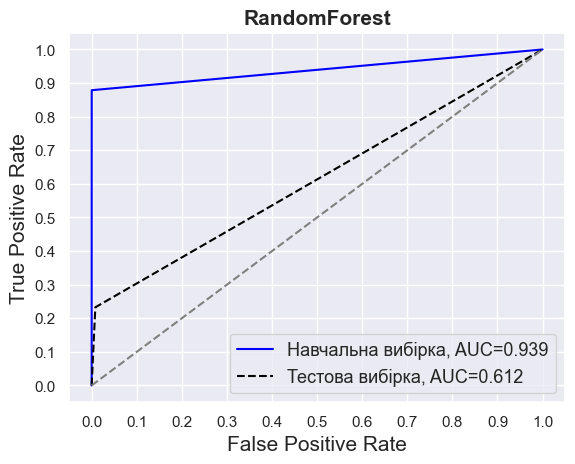

In [19]:
plot_roc_auc(y_train, y_train_pred_rf, y_test, y_test_pred_rf, "RandomForest")

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train Random Forest model with regularization
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate AUC for train and test sets
auc_train = roc_auc_score(y_train, y_train_pred_rf)
auc_test = roc_auc_score(y_test, y_test_pred_rf)

print(f"Train AUC = {auc_train}")
print(f"Test AUC = {auc_test}")


Train AUC = 0.9999346490654817
Test AUC = 0.6250031419310378


In [12]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i, index in enumerate(indices):
    print(f"{i+1}. Feature '{X.columns[index]}' - Importance: {importances[index]}")


Feature ranking:
1. Feature 'num_act_days_min_mnt1' - Importance: 0.017967322484985056
2. Feature 'num_act_days_min_mnt3' - Importance: 0.014926771619307643
3. Feature 'num_act_days_mea_mnt3' - Importance: 0.01442064674030423
4. Feature 'voice_out_td_cnt_min_mnt1' - Importance: 0.013677654013195095
5. Feature 'num_act_days_mea_mnt1' - Importance: 0.01258696949887794
6. Feature 'all_cnt_min_mnt3' - Importance: 0.01231799120164721
7. Feature 'voice_in_tar_dur_min_mnt1' - Importance: 0.011153099171861509
8. Feature 'conn_in_uniq_cnt_min_mnt1' - Importance: 0.011152141311964667
9. Feature 'voice_in_td_cnt_min_mnt3' - Importance: 0.01041338656620769
10. Feature 'voice_in_td_cnt_min_mnt1' - Importance: 0.01027241529584648
11. Feature 'device_brand_samsung' - Importance: 0.009791895119728822
12. Feature 'num_act_days_std_mnt3' - Importance: 0.009458969025465908
13. Feature 'voice_out_tar_dur_min_mnt1' - Importance: 0.009139556443909928
14. Feature 'device_days_usage' - Importance: 0.009093833

## LGBM

In [10]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import numpy as np


# Prepare your data (X and y)
X = df_train_fe.drop(['target', 'abon_id'], axis=1)
y = df_train_fe['target']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=777)

# Define the LGBMClassifier model
clf = lgb.LGBMClassifier(is_unbalance=True)

# Define the number of folds for cross-validation
n_splits = 5

# Initialize an empty list to store the test AUC scores for each fold
test_scores = []

# Perform K-fold cross-validation
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=777)
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the model on the current fold
    clf.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation set of the current fold
    y_val_pred = clf.predict(X_test_fold)
    
    # Calculate and store the AUC score for the current fold
    test_scores.append(roc_auc_score(y_test_fold, y_val_pred))

# Print the test AUC scores for each fold
for i, score in enumerate(test_scores):
    print(f"Fold {i+1} Test AUC = {score:.3f}")

# Calculate and print the average test AUC across all folds
print(f"Average Test AUC = {np.mean(test_scores):.3f}")


Fold 1 Test AUC = 0.826
Fold 2 Test AUC = 0.821
Fold 3 Test AUC = 0.818
Fold 4 Test AUC = 0.826
Fold 5 Test AUC = 0.815
Average Test AUC = 0.821


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_auc(y_train, y_train_pred, y_test, y_test_pred, title):
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    plt.plot(fpr_train, tpr_train, color='blue', label="Train, AUC={:.3f}".format(auc_train), linestyle='-')
    plt.plot(fpr_test, tpr_test, color='black', label="Test, AUC={:.3f}".format(auc_test), linestyle='--')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title(title, fontweight='bold', fontsize=15)
    plt.legend(prop={'size': 13}, loc='lower right')

    plt.show()


In [ ]:
#saving model
my_func.save_model(clf, X.columns.tolist()) 


Save LGBMClassifier_24062023_15_30.pickle


## Prediction using Test dataset

Test AUC = 0.891


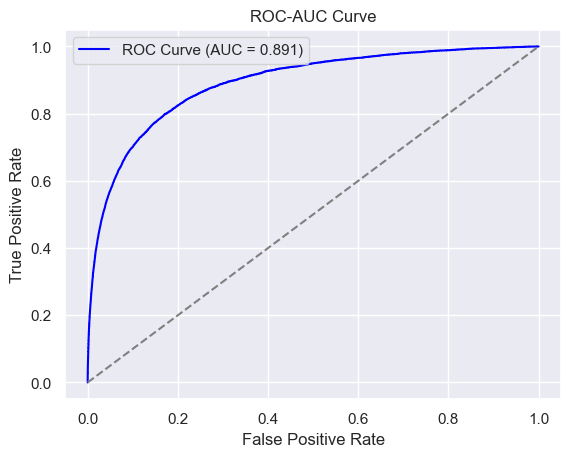

In [9]:

import lightgbm as lgb
import pickle
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Define the file name of the pickle file
pickle_file = "LGBMClassifier_24062023_15_30.pickle"

# Load the model
model, features = my_func.load_pickle(pickle_file)

# Prepare the test data (X_test)
y_test = df_test_fe['target']
X_test = df_test_fe.drop(['target', 'abon_id'], axis=1)


# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC = {auc:.3f}")

# Plot the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = {:.3f})".format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


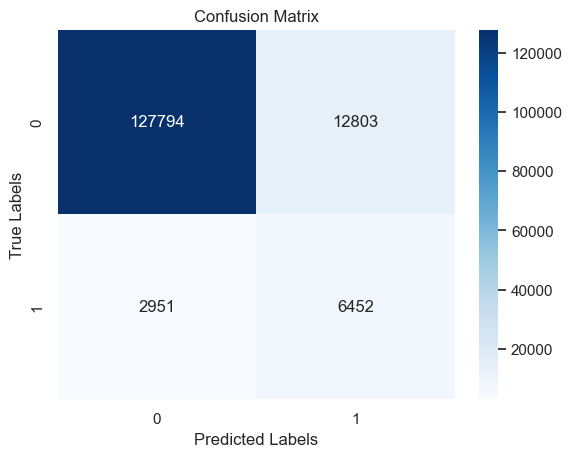

In [11]:
import seaborn as sns

# Predict test values using the LGBM model
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



## Feature Importance

In [75]:


X = df_train_fe.drop(['target', 'abon_id'], axis=1)
# Get feature importances
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame with feature names and importances
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


# Sort the DataFrame by importance in descending order
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Print the DataFrame
df_importances




,Feature,Importance
632,loc_market_share,116
606,lt,61
634,device_days_usage,45
604,Balance_uah,41
705,day_end_gba,32
...,...,...
620,DNZ_COUNT_open_loan_year5,0
264,clc_no_vas_roam_min_mnt1,0
623,Fax,0
263,all_roam_clc_mea_wk1,0


In [ ]:


# Save selected_features to a file
with open('selected_features.pickle', 'wb') as file:
    pickle.dump(selected_features, file)


In [ ]:
#save feature importance in file to compare later
df_importances.to_excel('feature_import_24062023_15_30.xlsx')

## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

df_train_fe = pd.read_pickle(file_path + fe_name_tr)
df_train_fe.fillna(-1, inplace=True)

# Prepare data (X and y)
X = df_train_fe.drop(['target', 'abon_id'], axis=1)
y = df_train_fe['target']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=777)

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = lr_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred))



              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     28080
         1.0       0.64      0.23      0.34      1920

    accuracy                           0.94     30000
   macro avg       0.80      0.61      0.66     30000
weighted avg       0.93      0.94      0.93     30000



In [6]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear']
}

# Create the logistic regression model
lr_model = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Make predictions on the validation set using the best model
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Evaluate the best model
print(classification_report(y_val, y_val_pred))


Best Hyperparameters:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     28080
         1.0       0.64      0.28      0.39      1920

    accuracy                           0.94     30000
   macro avg       0.80      0.63      0.68     30000
weighted avg       0.93      0.94      0.93     30000



In [7]:
# save model

my_func.save_model(best_model, X.columns.tolist()) 


Save LogisticRegression_27062023_09_03.pickle


## Prediction for ensemble

In [3]:
# load models
lgbm_model, lgbm_features = my_func.load_pickle('LGBMClassifier_24062023_15_30.pickle')
lr_model, lr_features = my_func.load_pickle('LogisticRegression_27062023_09_03.pickle')
rf_model, rf_features  = my_func.load_pickle('RandomForestClassifier_27062023_18_49.pickle')

# Prepare the test data (X_test)
df_test_fe = pd.read_pickle(file_path+fe_name_te)

# Replace missing values with -1
df_test_fe = df_test_fe.fillna(-1)

y_test = df_test_fe['target']
X_test = df_test_fe.drop(['target', 'abon_id'], axis=1)

# make predictions
lgbm_predictions = lgbm_model.predict(X_test).astype(int)
lr_predictions = lr_model.predict(X_test).astype(int)
rf_predictions = rf_model.predict(X_test).astype(int)



In [4]:
# Ensemble prediction using majority voting
ensemble_predictions = np.array([lgbm_predictions, lr_predictions, rf_predictions])
ensemble_predictions = np.transpose(ensemble_predictions)  # Transpose to align predictions for each sample
ensemble_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=ensemble_predictions)

# Evaluate ensemble predictions
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)

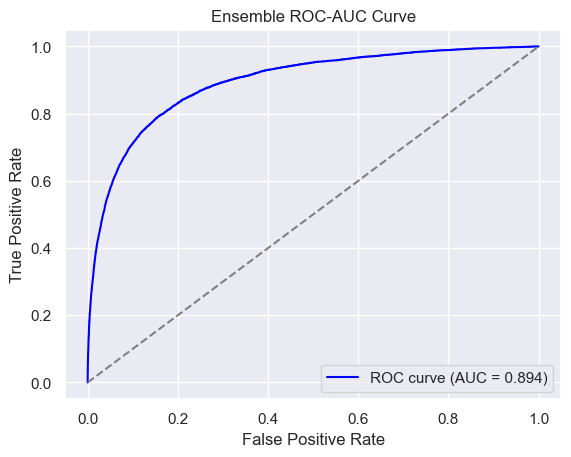

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ensemble probabilities
lgbm_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Ensemble probabilities using majority voting
ensemble_probabilities = np.mean([lgbm_probabilities, lr_probabilities, rf_probabilities], axis=0)

# Plot the ROC-AUC curve for ensemble predictions
my_func.plot_roc_auc_ensemble(y_test, ensemble_probabilities, "Ensemble ROC-AUC Curve")
plt.show()


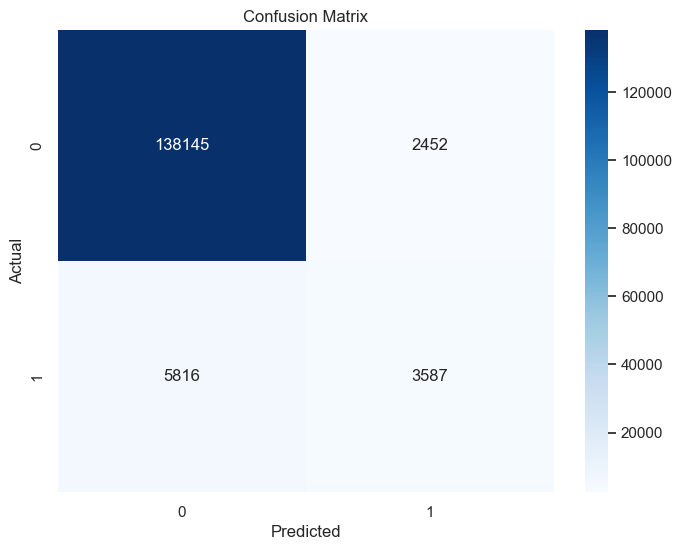

In [8]:
from sklearn.metrics import confusion_matrix

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
ensemble_predictions = np.where(ensemble_probabilities >= threshold, 1, 0)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, ensemble_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature Engineering


In [ ]:
# перевірка на missing значення
ms_val = my_func.count_missing_values(df_train_fe)
ms_val

## Working with missing values

In [58]:
#filtered_df = df_train_dpi[df_train_dpi['Application'] == 14]

def calculate_missing_values(df):
    """
    Calculate the number and percentage of missing values in a DataFrame.
    
    Parameters:
    - df (DataFrame): The input DataFrame.
    
    Returns:
    - missing_values (DataFrame): A DataFrame showing the count and percentage of missing values for each column.
    """
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    
    missing_values = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})
    missing_values = missing_values.sort_values(by='Missing Count', ascending=False)
    
    return missing_values


In [43]:
# Load dataframes
df_train_fe = pd.read_pickle(file_path+fe_name_tr)
df_train_dpi = pd.read_pickle(file_path+dpi_name_tr)
df_train_b_num = pd.read_pickle(file_path+b_num_name_tr)

# load important features
important_features=pd.read_pickle('feature_import_LGB_fe_DPI.pickle')

In [56]:
# load dataframe fe + dpi
df_train_fe_dpi = pd.read_pickle('df_train_fe_dpi.pickle')



# Load selected_features from the file
with open('selected_features_Fe_DPI.pickle', 'rb') as file:
    selected_features = pickle.load(file)


# left only important features
df_train_fe_dpi = df_train_fe_dpi[selected_features + ['target']+['abon_id']]



In [61]:

mis = calculate_missing_values(df_train_fe_dpi)
mis
# save missing to excel
mis.to_excel('missing_in_important.xlsx')

In [51]:
list_of_imp=important_features['Feature']
type(list_of_imp)

pandas.core.series.Series


### Transform DPI dataset



### function for transforming DPI dataset

In [4]:



# Unique values of 'Application'
unique_abon_ids = df_train_dpi['abon_id'].unique()
unique_values_train = df_train_dpi['Application'].unique()
unique_values_test = df_test_dpi['Application'].unique()
unique_applications = np.unique(np.concatenate((unique_values_train, unique_values_test)))
#unique_applications = np.array([14, 23])

# Create the df_t dataframe with 'abon_id' column
df_t = pd.DataFrame({'abon_id': unique_abon_ids})

# Pre-filter df_train_dpi for each application
filtered_dfs = {}
for app in unique_applications:
    filtered_dfs[app] = df_train_dpi[df_train_dpi['Application'] == app]

# Initialize dictionaries to store column values
column_values = {}
for app in unique_applications:
    col_names = [f"{app}_SUM_of_Duration_sec", f"{app}_SUM_of_Volume_kb", f"{app}_SUM_of_Count_events", f"{app}_MAX_of_day_cnt"]
    column_values[col_names[0]] = []
    column_values[col_names[1]] = []
    column_values[col_names[2]] = []
    column_values[col_names[3]] = []

# Progress update interval in seconds
progress_interval = 3 * 60  # 3 minutes

# Iterate over each row in df_t
total_rows = len(df_t)
start_time = time.time()
last_progress_time = start_time
for row_index, row in df_t.iterrows():
    abon_id = row['abon_id']
    
    # Iterate over each application
    for app_index, app in enumerate(unique_applications):
        col_names = [f"{app}_SUM_of_Duration_sec", f"{app}_SUM_of_Volume_kb", f"{app}_SUM_of_Count_events", f"{app}_MAX_of_day_cnt"]
        filtered_df = filtered_dfs[app]
        
        # Find the values for the current abon_id and application
        values = filtered_df.loc[filtered_df['abon_id'] == abon_id, ['SUM_of_Duration_sec', 'SUM_of_Volume_kb', 'SUM_of_Count_events', 'MAX_of_day_cnt']].values
        
        if len(values) > 0:
            column_values[col_names[0]].append(values[0][0])
            column_values[col_names[1]].append(values[0][1])
            column_values[col_names[2]].append(values[0][2])
            column_values[col_names[3]].append(values[0][3])
        else:
            column_values[col_names[0]].append(None)
            column_values[col_names[1]].append(None)
            column_values[col_names[2]].append(None)
            column_values[col_names[3]].append(None)
    
    # Print progress every 3 minutes
    current_time = time.time()
    elapsed_time = current_time - last_progress_time
    if elapsed_time >= progress_interval:
        progress = (row_index + 1) / total_rows * 100
        print(f"Progress: {progress:.2f}%")
        last_progress_time = current_time

# Add the values as new columns to df_t
for col_name, values in column_values.items():
    df_t[col_name] = values

# Print the resulting df_t dataframe
#print(df_t)


Progress: 0.28%
Progress: 0.55%
Progress: 0.83%
Progress: 1.11%
Progress: 1.38%
Progress: 1.66%
Progress: 1.94%
Progress: 2.21%
Progress: 2.49%
Progress: 2.77%
Progress: 3.04%
Progress: 3.32%
Progress: 3.60%
Progress: 3.87%
Progress: 4.15%
Progress: 4.43%
Progress: 4.70%
Progress: 4.98%
Progress: 5.26%
Progress: 5.54%
Progress: 5.81%
Progress: 6.09%
Progress: 6.37%
Progress: 6.64%
Progress: 6.92%
Progress: 7.20%
Progress: 7.47%
Progress: 7.75%
Progress: 8.02%
Progress: 8.30%
Progress: 8.58%
Progress: 8.86%
Progress: 9.13%
Progress: 9.41%
Progress: 9.69%
Progress: 9.96%
Progress: 10.24%
Progress: 10.52%
Progress: 10.79%
Progress: 11.07%
Progress: 11.35%
Progress: 11.62%
Progress: 11.90%
Progress: 12.18%
Progress: 12.45%
Progress: 12.73%
Progress: 13.01%
Progress: 13.28%
Progress: 13.56%
Progress: 13.84%
Progress: 14.12%
Progress: 14.39%
Progress: 14.67%
Progress: 14.95%
Progress: 15.22%
Progress: 15.50%
Progress: 15.78%
Progress: 16.05%
Progress: 16.33%
Progress: 16.61%
Progress: 16.88%

### loading DPI dataset

In [3]:
# load transformed DPI dataset
df_train_dpi_t = pd.read_pickle('df_t_dpi.pickle')

In [ ]:
# Merge the two datasets based on 'abon_id' column
#df_combined = pd.merge(df_train_fe, df_train_dpi_t, on='abon_id', how='left')

# Check the resulting combined dataframe
#df_combined


In [6]:
# save as pickle
#df_combined.to_pickle('df_train_fe_dpi.pickle')


### LightGBM for fe + dpi dataset

In [21]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import numpy as np

df_train_fe_dpi = pd.read_pickle('df_train_fe_dpi.pickle')
#df_train_fe_dpi = my_func.reduce_mem_usage(df_train_fe_dpi)
df_train_fe_dpi.fillna(-1, inplace=True)

In [23]:
df_train_fe_dpi.head()

Ama_rchrgmnt_sum_max_mnt1  content_clc_mea_mnt1  content_cnt_max_mnt1  \
0                          0                   0.0             13.843750   
1                          0                   0.0             11.359375   
2                          0                   0.0             10.265625   
3                          0                   0.0              9.976562   
4                          0                   0.0              6.750000   

   voice_out_short_part_max_mnt1  voice_mts_in_nrest_part_std_mnt1  \
0                       1.480469                          0.000000   
1                       1.000000                          1.000000   
2                       0.000000                          0.000000   
3                       1.033203                          1.000000   
4                       1.000977                          1.000977   

   num_act_days_max_mnt1  sms_roam_clc_min_mnt1  \
0               5.324219                      0   
1               5.324219                      0   
2               5.324219                      0   
3               5.324219                      0   
4               5.324219                      0   

   voice_in_cmpttrs_avg_durmin_mnt1  com_num_part_mea_mnt1  pay_avg_mea_mnt1  \
0                         19.046875               1.657227          0.000000   
1                          0.000000               1.000977         15.015625   
2                          0.000000               1.015625         11.617188   
3                          0.000000               1.002930         11.617188   
4                         28.859375               1.047852          0.000000   

   voice_out_tar_dur_std_mnt1  voice_out_tar_dur_min_mnt1  gprs_clc_mea_mnt1  \
0                   23.140625                    17.90625                0.0   
1                   87.625000                   102.68750                0.0   
2                   54.843750                    73.87500                0.0   
3                   42.843750                    45.37500                0.0   
4                   70.187500                    70.37500                0.0   

   pay_max_min_mnt3  voice_in_short_part_mea_mnt3  voice_in_roam_clc_std_mnt1  \
0               0.0                           0.0                         0.0   
1               0.0                           1.0                         0.0   
2               0.0                           0.0                         0.0   
3               0.0                           1.0                         0.0   
4               0.0                           1.0                         0.0   

   conn_out_uniq_cnt_std_mnt1  voice_mts_in_dwork_part_td_mnt3  \
0                    1.164062                        -1.000977   
1                    3.501953                        -1.000000   
2                    1.164062                         1.000977   
3                    1.776367                         1.000000   
4                    2.365234                        -1.000000   

   data_3g_tar_vol_mea_mnt3  voice_in_fix_tar_dur_mea_mnt3  \
0                      0.00                       4.007812   
1                    190.00                       0.000000   
2                      0.00                       0.000000   
3                      0.00                       0.000000   
4                    173.25                       3.853516   

   voice_in_tar_dur_max_mnt3  ks_num_part_td_mnt3  data_3g_dou_mea_mnt3  \
0                    52.3750             1.004883              0.000000   
1                   101.4375             1.000000              5.324219   
2                    68.6250             1.000000              0.000000   
3                    93.0625             0.000000              0.000000   
4                    89.0625            -1.000000              3.750000   

   voice_mts_out_drest_partmea_mnt1  conn_com_part_min_mnt1  \
0                          0.000000                1.480469   
1                     

In [ ]:
# select best features and retrain model
df_train_fe_dpi = df_train_fe_dpi[selected_features + ['target']+['abon_id']]
df_train_fe_dpi.shape

In [37]:

# Prepare your data (X and y)
X = df_train_fe_dpi.drop(['target', 'abon_id'], axis=1)
y = df_train_fe_dpi['target']

In [38]:


# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=777)

# Define the LGBMClassifier model
clf = lgb.LGBMClassifier(is_unbalance=True)

# Define the number of folds for cross-validation
n_splits = 5

# Initialize an empty list to store the test AUC scores for each fold
test_scores = []

# Perform K-fold cross-validation
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=777)
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the model on the current fold
    clf.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation set of the current fold
    y_val_pred = clf.predict(X_test_fold)
    
    # Calculate and store the AUC score for the current fold
    test_scores.append(roc_auc_score(y_test_fold, y_val_pred))

# Print the test AUC scores for each fold
for i, score in enumerate(test_scores):
    print(f"Fold {i+1} Test AUC = {score:.3f}")

# Calculate and print the average test AUC across all folds
print(f"Average Test AUC = {np.mean(test_scores):.3f}")

Fold 1 Test AUC = 0.827
Fold 2 Test AUC = 0.823
Fold 3 Test AUC = 0.820
Fold 4 Test AUC = 0.826
Fold 5 Test AUC = 0.820
Average Test AUC = 0.823


In [27]:

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame with feature names and importances
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(df_importances)


                        Feature  Importance
632            loc_market_share          96
606                          lt          55
634           device_days_usage          53
604                 Balance_uah          39
705                 day_end_gba          27
...                         ...         ...
1655  703.0_SUM_of_Duration_sec           0
1657  703.0_SUM_of_Count_events           0
1658       703.0_MAX_of_day_cnt           0
1659  705.0_SUM_of_Duration_sec           0
3882      2578.0_MAX_of_day_cnt           0

[3883 rows x 2 columns]


In [42]:
df_importances.to_pickle('feature_import_LGB_fe_DPI.pickle')

In [ ]:
# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame with feature names and importances
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Filter features with importance greater than 0
selected_features = df_importances[df_importances['Importance'] > 0]['Feature'].tolist()


#selected_features


In [53]:
# save important selected features
import pickle

# Save selected_features to a file
with open('selected_features_Fe_DPI.pickle', 'wb') as file:
    pickle.dump(selected_features, file)


### Transform Num dataset



## Predict on Test sample


In [ ]:
y = df_tr['target']
X = df_tr.drop(['target', 'abon_id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=777, shuffle=True)

In [ ]:
y_test = df_test_fe['target']
X_test = df_test_fe.drop(['target', 'abon_id'], axis=1)
X_test.replace(np.inf, -1, inplace=True)
X_test.fillna(-1, inplace=True)

In [ ]:
pred_lgb = lgb_model.predict(X_train)
pred_lgb_test = lgb_model.predict_proba(X_test)[:,1]

In [ ]:
#binary_classification_metrics(y, clf.predict(X), y_test, clf.predict(X_test))

In [22]:
def plot_roc_auc(y_train, y_train_pred, y_test, y_test_pred, title):
    # Calculate the ROC curve and AUC for train set
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred)

    # Calculate the ROC curve and AUC for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # Plot the ROC curve for train set
    plt.plot(fpr_train, tpr_train, color='blue',
             label="Навчальна вибірка, AUC={:.3f}".format(auc_train), linestyle='-')

    # Plot the ROC curve for test set
    plt.plot(fpr_test, tpr_test, color='black',
             label="Тестова вибірка, AUC={:.3f}".format(auc_test), linestyle='--')

    # Plot the diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Set x-axis and y-axis labels
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.ylabel("True Positive Rate", fontsize=15)

    # Set x-axis and y-axis tick marks
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.yticks(np.arange(0.0, 1.1, step=0.1))

    # Set the title and legend
    plt.title(title, fontweight='bold', fontsize=15)
    plt.legend(prop={'size': 13}, loc='lower right')

    # Show the plot
    plt.show()
